In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("vgg16_cifar10.csv")
data.head()

,run,operation,started,time,status,label,blocker,dataset,gpu,model,...,Accuracy/preprune,Loss/postprune,Loss/preprune,Sparsity,best_post_acc,best_post_loss,best_pre_acc,best_pre_loss,immediate_post_acc,immediate_post_loss
0,e8b2cafa,main.py,2022-05-23 20:26:03,1:57:27,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9326,2.302585,0.328595,0.9405,0.1000,2.302505,0.9327,0.311399,0.1000,2.321681
1,41534571,main.py,2022-05-23 20:23:07,1:44:20,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9323,2.302581,0.328686,0.9828,0.1000,2.302532,0.9329,0.316664,0.1000,2.343990
2,c8ce4c2f,main.py,2022-05-23 20:22:39,1:44:39,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9321,2.302587,0.344240,0.9946,0.1000,2.302479,0.9322,0.308769,0.1000,2.323124
3,b52b33c3,main.py,2022-05-23 20:22:32,1:45:37,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9319,2.302583,0.327660,0.9959,0.1000,2.302502,0.9347,0.314287,0.1000,2.323331
4,7055c20c,main.py,2022-05-23 20:19:51,2:04:40,completed,vgg16_cifar10,none,cifar10,cuda,vgg16,...,0.9298,0.342136,0.328709,0.9149,0.9319,0.315970,0.9317,0.312124,0.4707,1.748132


In [3]:
data = data[["blocker", "pruner", "best_pre_acc", "best_post_acc", "Sparsity"]]
data["acc_drop"] = data["best_pre_acc"] - data["best_post_acc"]
data.head()

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,acc_drop
0,none,magnitude,0.9327,0.1000,0.9405,0.8327
1,none,magnitude,0.9329,0.1000,0.9828,0.8329
2,none,magnitude,0.9322,0.1000,0.9946,0.8322
3,none,magnitude,0.9347,0.1000,0.9959,0.8347
4,none,relative_error,0.9317,0.9319,0.9149,-0.0002


In [4]:
data.sort_values(by="acc_drop")

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,acc_drop
24,alds,alignment_output,0.9308,0.9332,0.8865,-0.0024
34,square,relative_error,0.9343,0.9360,0.8341,-0.0017
69,alds,alignment_output,0.9337,0.9348,0.8825,-0.0011
84,square,alignment_output,0.9341,0.9351,0.8449,-0.0010
39,square,alignment_output,0.9329,0.9335,0.8566,-0.0006
...,...,...,...,...,...,...
31,square,magnitude,0.9346,0.1000,0.9609,0.8346
3,none,magnitude,0.9347,0.1000,0.9959,0.8347
77,square,magnitude,0.9347,0.1000,0.9778,0.8347
61,alds,magnitude,0.9354,0.1000,0.9719,0.8354


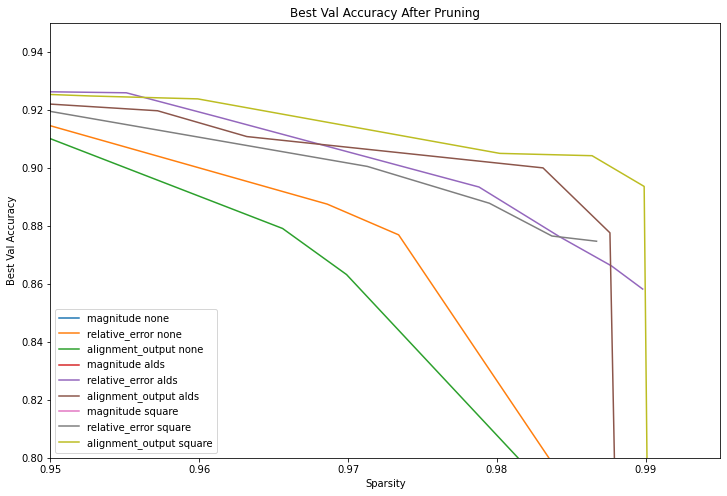

In [19]:
plt.figure(figsize=(12, 8))
for blocker in data["blocker"].unique():
    b = data[data["blocker"] == blocker]
    for pruner in b["pruner"].unique():
        p = b[b["pruner"] == pruner].sort_values(by="Sparsity")
        plt.plot(p["Sparsity"], p["best_post_acc"], label=f"{pruner} {blocker}")
plt.legend()
plt.xlabel("Sparsity")
plt.ylabel("Best Val Accuracy")
plt.ylim(0.8, 0.95)
plt.xlim(0.95, 0.995)
plt.title("Best Val Accuracy After Pruning")
plt.show()